In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 

# Load UCI AIDS crinical dataset - https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
y=y.cid

# Prepare datasets 
# Split dataset into a training set and test set
# Apply scaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.3161629296063751, 0.31056182399746224, 0.2663345766091412, 0.25883073947585145, 0.25744563174791746, 0.23143799714107474, 0.2336697976555031, 0.24233199840694375, 0.2433840386936043]


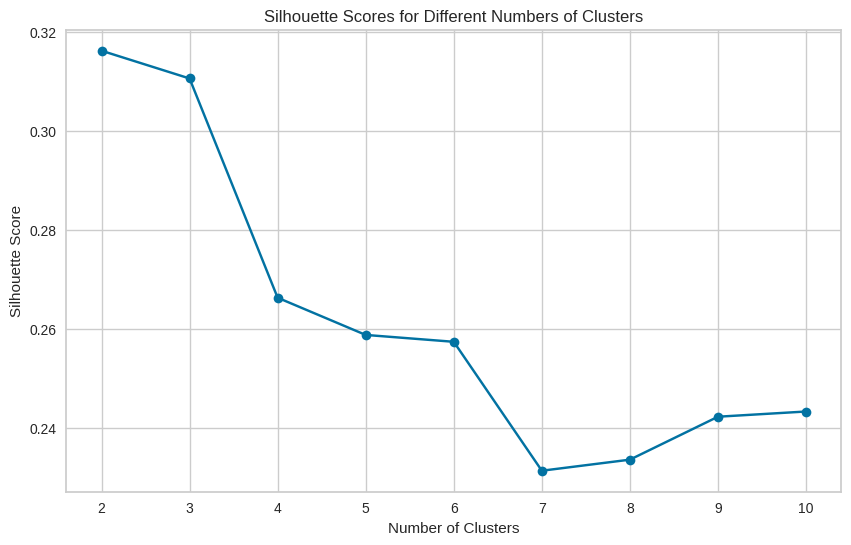

(2, 0.3161629296063751, 0.31300368625269925)

In [106]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

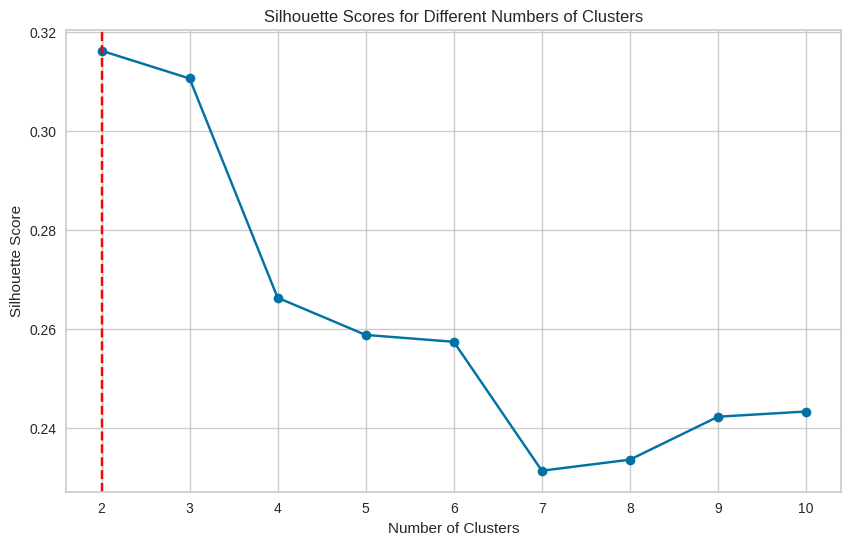

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

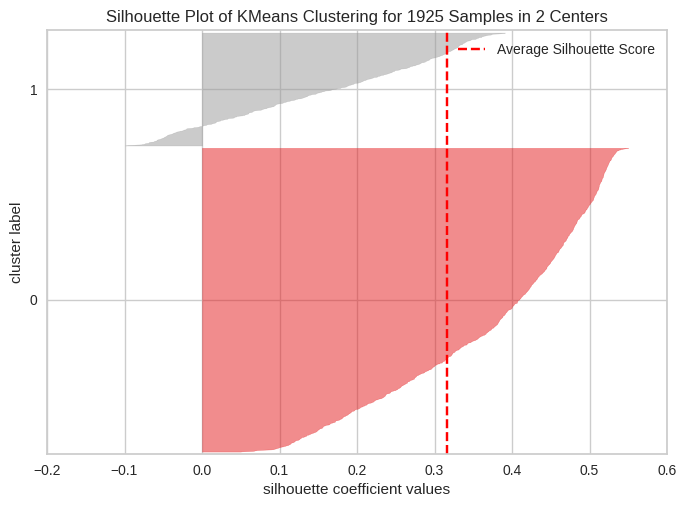

In [37]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

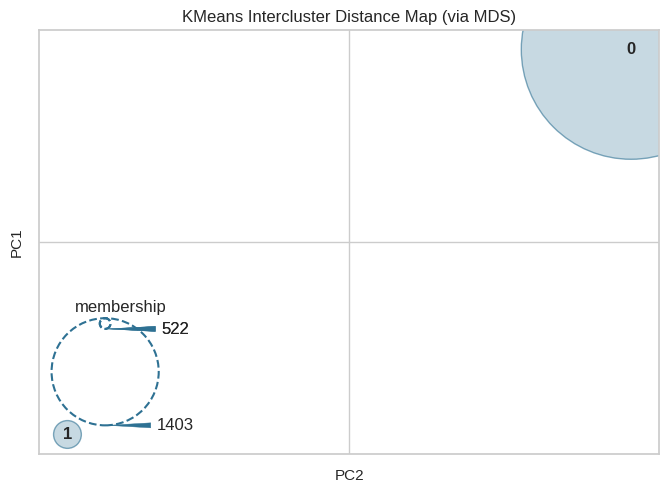

In [38]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

In [75]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 

# Load UCI Wine Quality - https://archive.ics.uci.edu/dataset/186/wine+quality

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare datasets 
# Split dataset into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) # 70% training and 30% test

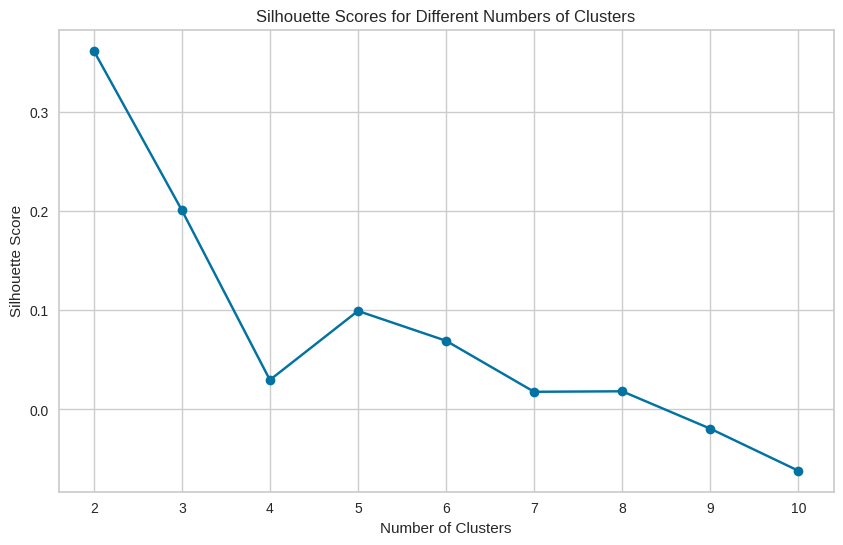

(2, 0.36148981565163885, 0.352152103551214)

In [66]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

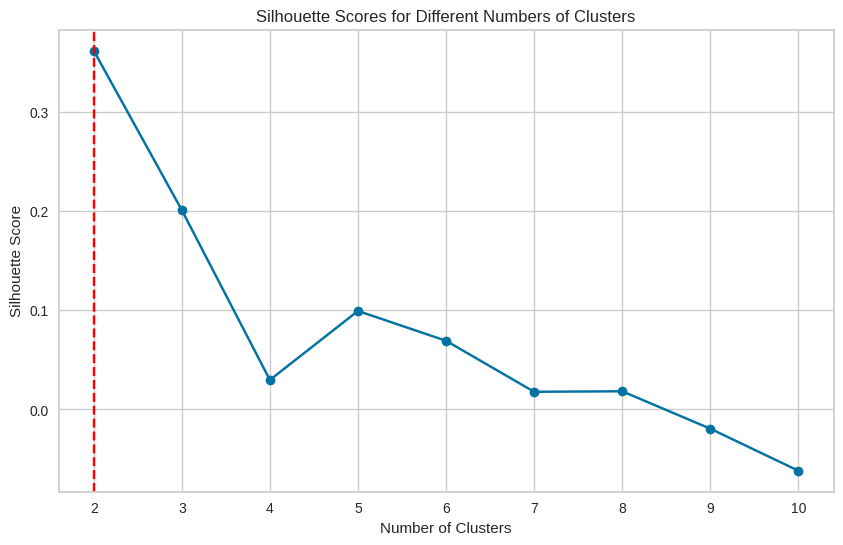

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

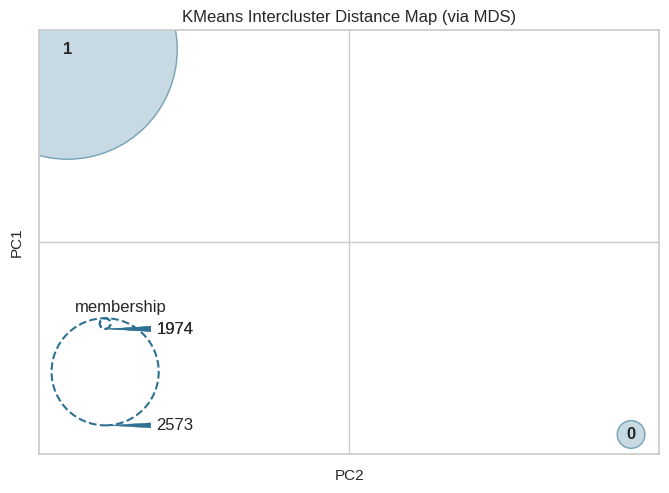

In [69]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

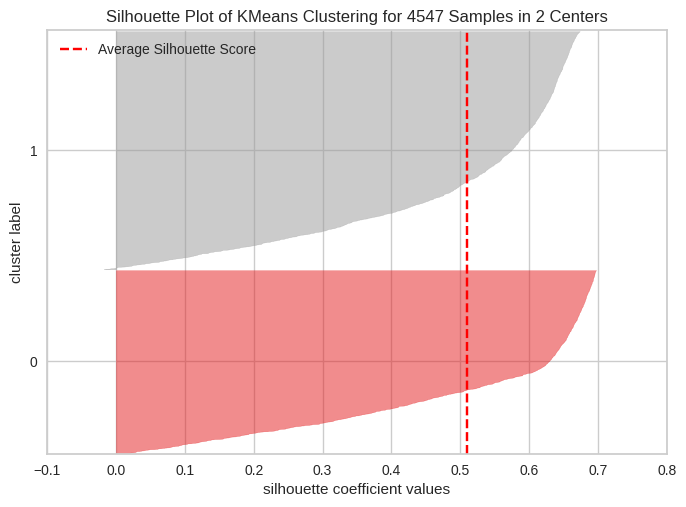

In [68]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

## 2. Apply the dimensionality reduction algorithms on the datasets. You will report on each of the dimensionality reduction algorithms, resulting in 8 demonstrations.

In [1]:
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn.decomposition import PCA, FastICA
#from sklearn.random_projection import GaussianRandomProjection
from sklearn import random_projection
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
import numpy as np
from ucimlrepo import fetch_ucirepo 

# Load UCI AIDS crinical dataset - https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
y=y.cid

### 2.1. PCA - AIDS

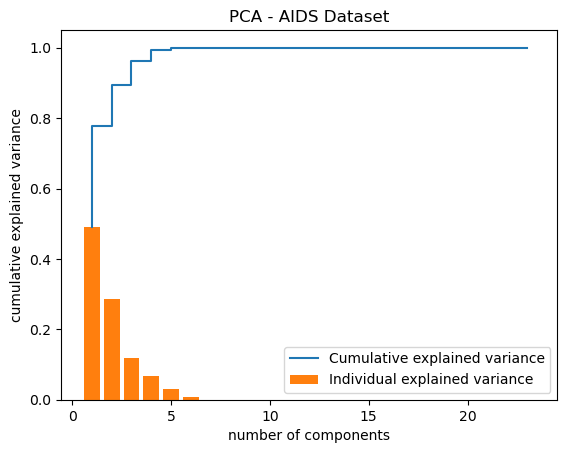

In [2]:
pca = PCA(random_state=100).fit(X)

# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color="C1", label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label='Cumulative explained variance')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA - AIDS Dataset")
plt.legend(loc='best')
plt.show()

In [3]:
start = time.time()
pca = PCA(n_components= 6, random_state=100).fit(X)
print("Time(s) " + str(time.time() - start))
print("original shape:", X.shape)
X_pca = pca.transform(X)
print("transformed shape:", X_pca.shape)
print()

Time(s) 0.014291048049926758
original shape: (2139, 23)
transformed shape: (2139, 6)



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
cv_score = cross_val_score(classifier, X_train, y_train, cv=20).mean()
print("Cross validation score: " + str(cv_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Cross validation score: 0.8351846785225719
Test Accuracy: 0.8037383177570093


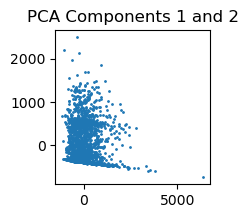

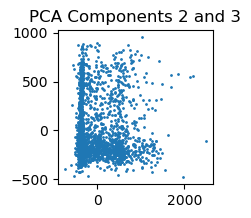

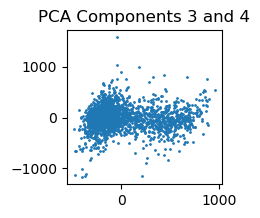

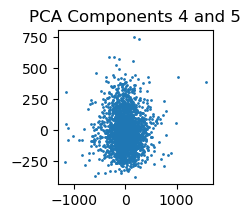

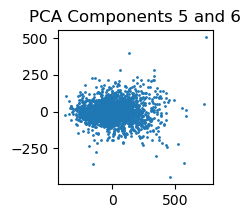

In [5]:
n = 6
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('PCA Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_pca[:,i], X_pca[:,i+1], s=1)

### 2.2 ICA - AIDS

In [6]:
best_n = (0, 0)
scores = []
for i in range(2, 20):
    ica = FastICA(n_components=i, max_iter=1000, tol=0.1, random_state=100).fit(X)
    X_ica = ica.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    scores.append(cv_score)
    print("n_components: {} , Cross Validation Score: {}".format(i, cv_score))
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
print("Best n_components: " + str(best_n[0]))
ica = FastICA(n_components=int(best_n[0]), max_iter=10000, tol=0.1, random_state=100).fit(X)
X_ica = ica.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

n_components: 2 , Cross Validation Score: 0.6856087551299588
n_components: 3 , Cross Validation Score: 0.7988782489740084
n_components: 4 , Cross Validation Score: 0.8100410396716828
n_components: 5 , Cross Validation Score: 0.8141518467852258
n_components: 6 , Cross Validation Score: 0.7931258549931602
n_components: 7 , Cross Validation Score: 0.8135430916552668
n_components: 8 , Cross Validation Score: 0.8053830369357046
n_components: 9 , Cross Validation Score: 0.8136593707250344
n_components: 10 , Cross Validation Score: 0.7809507523939809
n_components: 11 , Cross Validation Score: 0.8176812585499317
n_components: 12 , Cross Validation Score: 0.8222777017783859
n_components: 13 , Cross Validation Score: 0.8480027359781122
n_components: 14 , Cross Validation Score: 0.828201094391245
n_components: 15 , Cross Validation Score: 0.8597400820793434
n_components: 16 , Cross Validation Score: 0.8451094391244871
n_components: 17 , Cross Validation Score: 0.8417168262653899
n_components: 18 

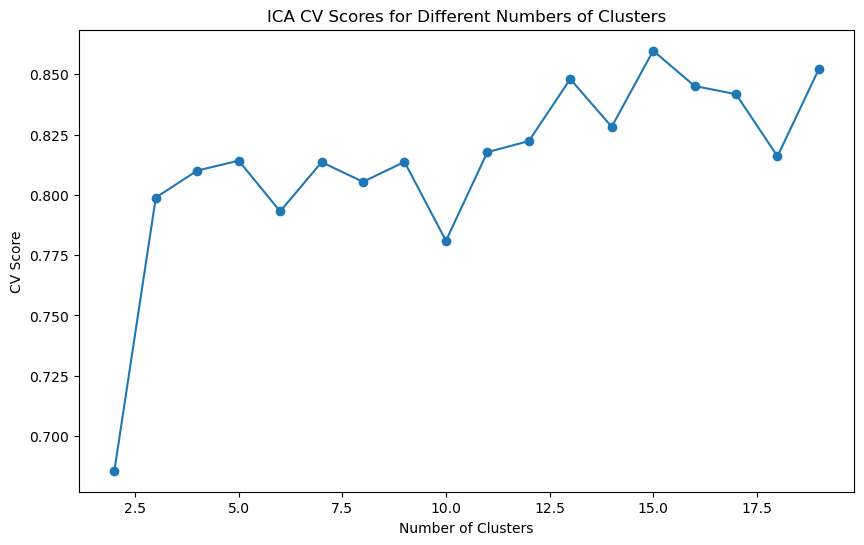

In [7]:
# Draw ICA Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title("ICA CV Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CV Score")
plt.show()

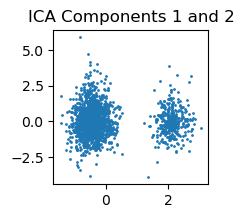

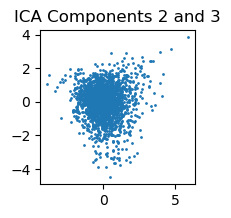

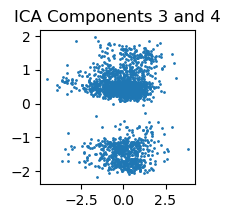

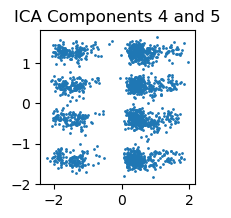

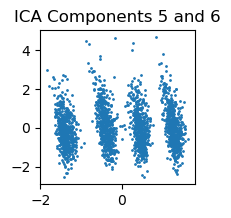

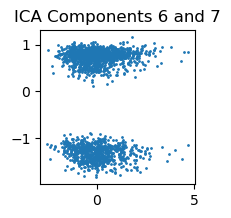

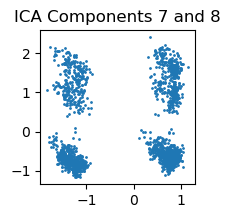

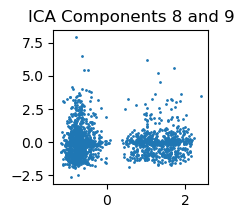

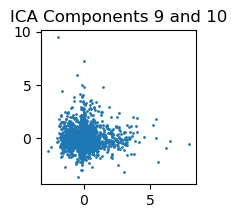

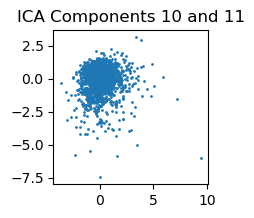

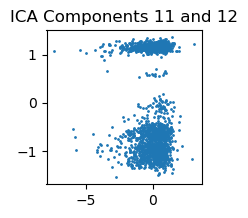

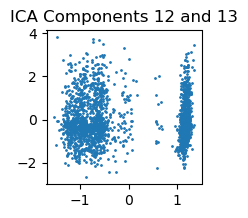

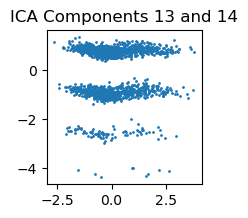

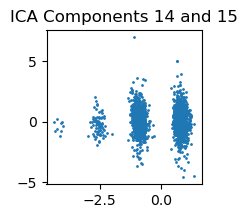

In [8]:
n = 15
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('ICA Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_ica[:,i], X_ica[:,i+1], s=1)

### 2.3 Randomized Projections - AIDS

In [9]:
best_n = (0, 0)
scores = []
for i in range(2, 20):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=100).fit(X)
    X_rp = rp.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    scores.append(cv_score)
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.SparseRandomProjection(n_components=best_n[0], random_state=100).fit(X)
X_rp = rp.fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 8
Test Accuracy: 0.6752336448598131


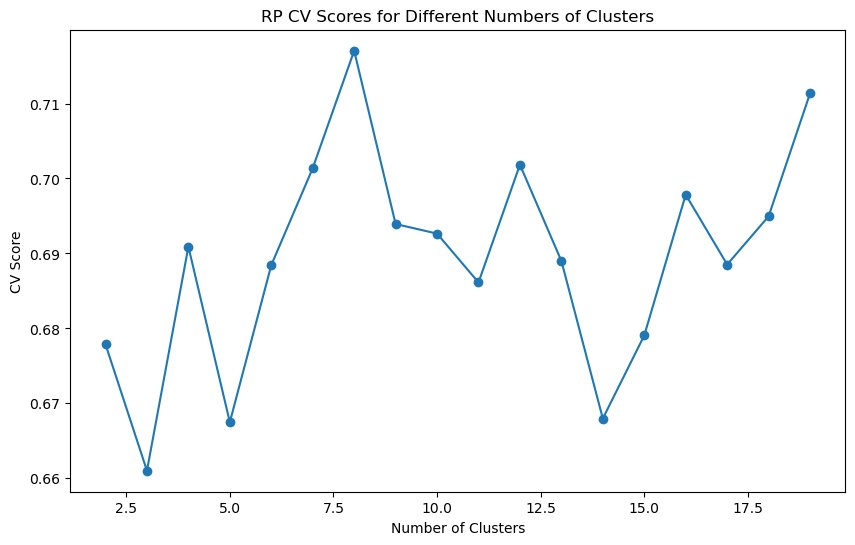

In [10]:
# Draw Randomized Projections Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title("RP CV Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CV Score")
plt.show()

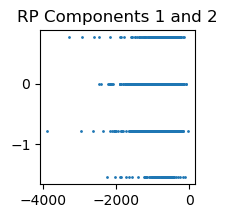

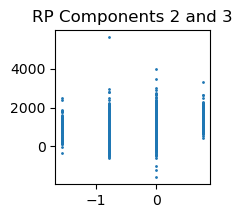

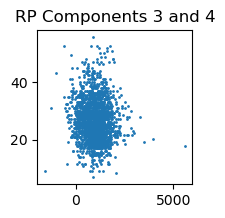

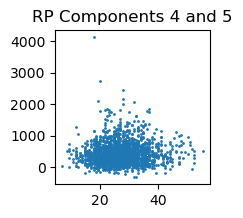

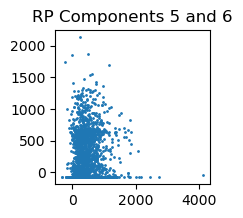

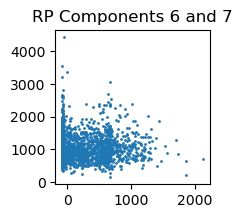

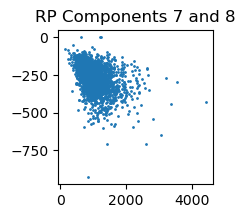

In [11]:
n = 8
rp = random_projection.SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('RP Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_rp[:,i], X_rp[:,i+1], s=1)

### 2.4. SVD - AIDS

5

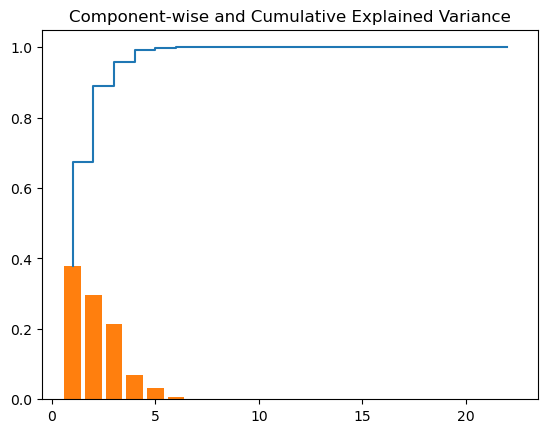

In [12]:
tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_tsvd = tsvd.fit(X)

tsvd_var_ratios = tsvd.explained_variance_ratio_
plt.bar(range(1, len(tsvd_var_ratios) + 1), tsvd_var_ratios, color="C1", label='Individual explained variance')
plt.step(range(1, len(tsvd_var_ratios) + 1), np.cumsum(tsvd_var_ratios), label='Cumulative explained variance')

plt.title("Component-wise and Cumulative Explained Variance")

# https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(tsvd_var_ratios, 0.99)

In [13]:
svd = TruncatedSVD(n_components=6).fit(X)
X_svd = svd.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Test Accuracy: 0.8060747663551402


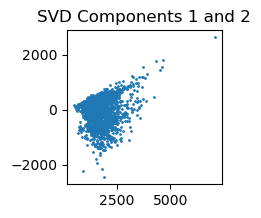

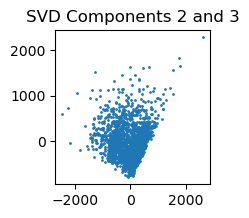

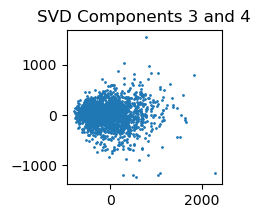

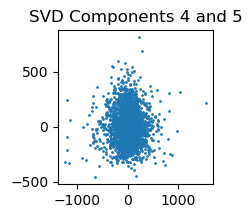

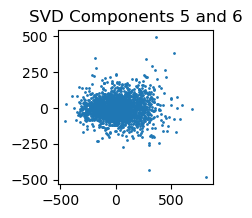

In [14]:
n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('SVD Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_svd[:,i], X_svd[:,i+1], s=1)

In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn.decomposition import PCA, FastICA
#from sklearn.random_projection import GaussianRandomProjection
from sklearn import random_projection
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
import numpy as np
from ucimlrepo import fetch_ucirepo 

# Load UCI Wine Quality - https://archive.ics.uci.edu/dataset/186/wine+quality

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

### 2.5 PCA - Wine Quality

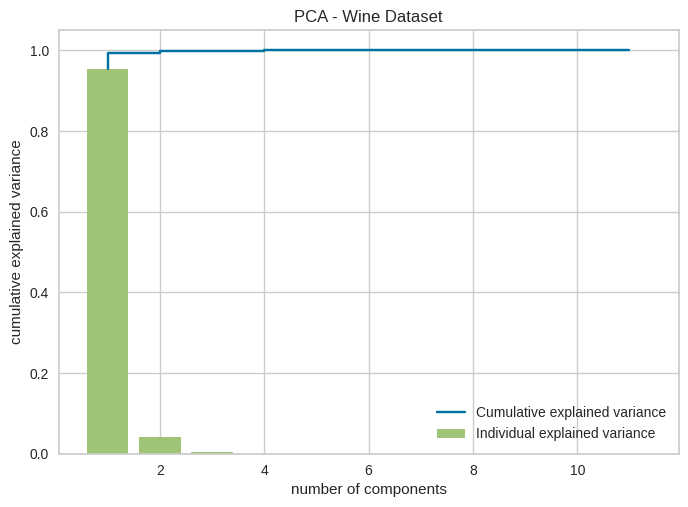

Time(s) 0.006022214889526367
original shape: (6497, 11)
transformed shape: (6497, 3)

Cross validation score: 0.47489530739530733
Test Accuracy: 0.44


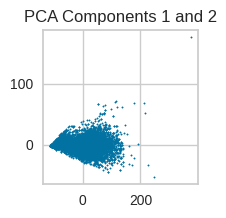

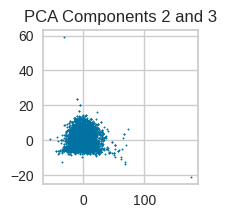

In [17]:
pca = PCA(random_state=100).fit(X)

# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color="C1", label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label='Cumulative explained variance')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA - Wine Dataset")
plt.legend(loc='best')
plt.show()

start = time.time()
pca = PCA(n_components= 3, random_state=100).fit(X)
print("Time(s) " + str(time.time() - start))
print("original shape:", X.shape)
X_pca = pca.transform(X)
print("transformed shape:", X_pca.shape)
print()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 10)
cv_score = cross_val_score(classifier, X_train, y_train, cv=20).mean()
print("Cross validation score: " + str(cv_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

n = 3
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('PCA Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_pca[:,i], X_pca[:,i+1], s=1)

### 2.6 ICA - Wine Quality

n_components: 2 , Cross Validation Score: 0.46508538758538753
n_components: 3 , Cross Validation Score: 0.4756571131571132
n_components: 4 , Cross Validation Score: 0.5095158895158896
n_components: 5 , Cross Validation Score: 0.539546332046332
n_components: 6 , Cross Validation Score: 0.5243399168399169
n_components: 7 , Cross Validation Score: 0.5474294624294624
n_components: 8 , Cross Validation Score: 0.5441557766557767
n_components: 9 , Cross Validation Score: 0.5422289872289872
n_components: 10 , Cross Validation Score: 0.5555093555093554
n_components: 11 , Cross Validation Score: 0.5541528066528066
n_components: 12 , Cross Validation Score: 0.5489835164835165
n_components: 13 , Cross Validation Score: 0.5582053757053757
n_components: 14 , Cross Validation Score: 0.5416691416691417
n_components: 15 , Cross Validation Score: 0.5532113157113158
n_components: 16 , Cross Validation Score: 0.5489731214731214
n_components: 17 , Cross Validation Score: 0.5447520047520047
n_components: 18

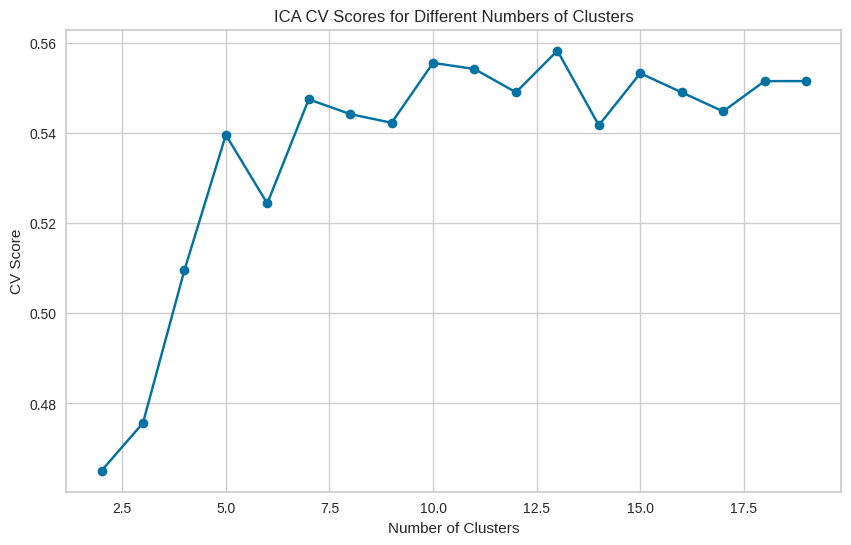

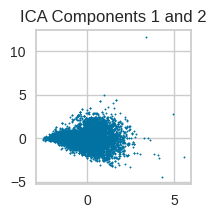

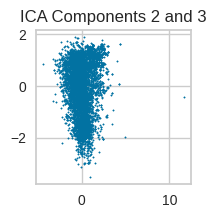

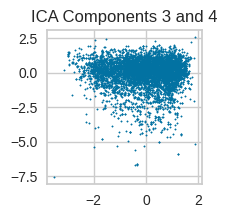

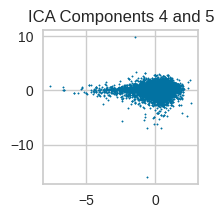

In [19]:
best_n = (0, 0)
scores = []
for i in range(2, 20):
    ica = FastICA(n_components=i, max_iter=1000, tol=0.1, random_state=100).fit(X)
    X_ica = ica.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    scores.append(cv_score)
    print("n_components: {} , Cross Validation Score: {}".format(i, cv_score))
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
print("Best n_components: " + str(best_n[0]))
ica = FastICA(n_components=int(best_n[0]), max_iter=10000, tol=0.1, random_state=100).fit(X)
X_ica = ica.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

# Draw ICA Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title("ICA CV Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CV Score")
plt.show()

n = 5
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('ICA Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_ica[:,i], X_ica[:,i+1], s=1)

### 2.7 Randomized Projections - Wine Quality

Best n_components: 5
Test Accuracy: 0.5392307692307692


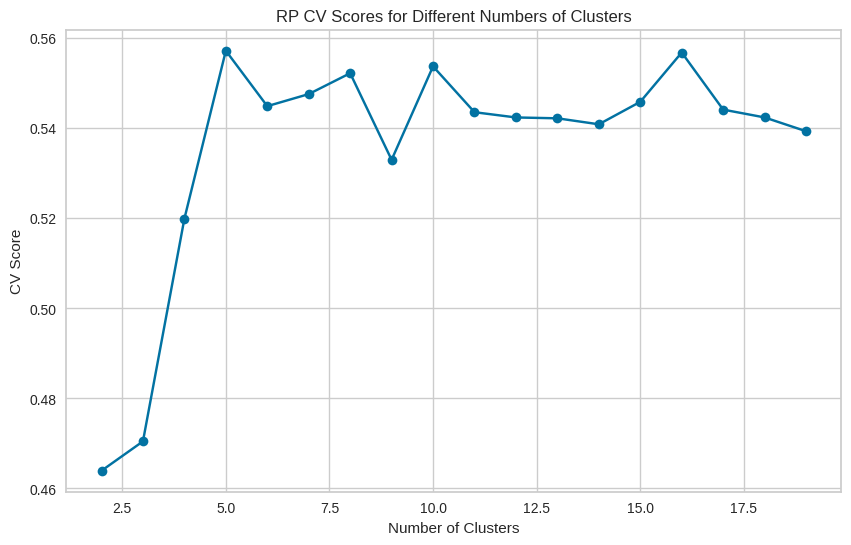

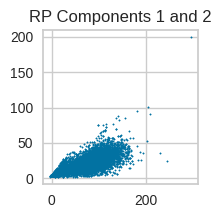

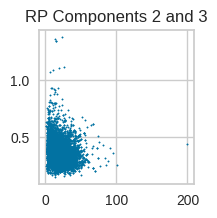

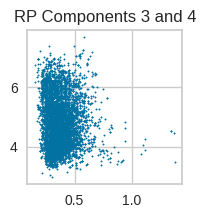

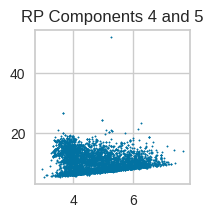

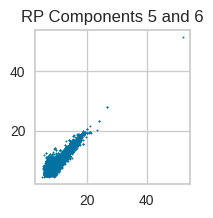

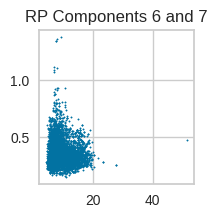

In [22]:
best_n = (0, 0)
scores = []
for i in range(2, 20):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=100).fit(X)
    X_rp = rp.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    scores.append(cv_score)
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.SparseRandomProjection(n_components=best_n[0], random_state=100).fit(X)
X_rp = rp.fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

# Draw Randomized Projections Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title("RP CV Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CV Score")
plt.show()

n = 7
rp = random_projection.SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('RP Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_rp[:,i], X_rp[:,i+1], s=1)

### 2.8 SVD - Wine Quality

Test Accuracy: 0.5415384615384615


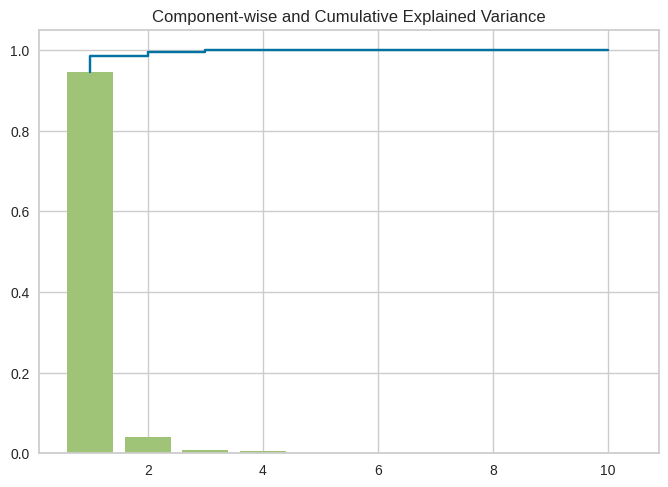

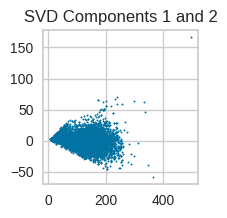

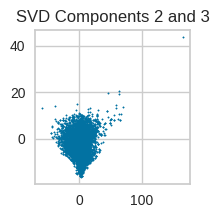

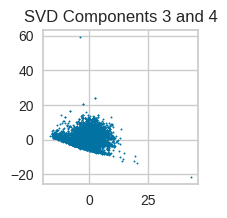

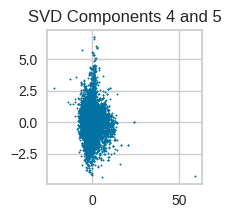

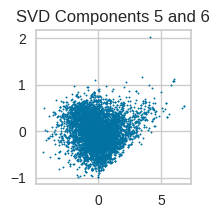

In [26]:
tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_tsvd = tsvd.fit(X)

tsvd_var_ratios = tsvd.explained_variance_ratio_
plt.bar(range(1, len(tsvd_var_ratios) + 1), tsvd_var_ratios, color="C1", label='Individual explained variance')
plt.step(range(1, len(tsvd_var_ratios) + 1), np.cumsum(tsvd_var_ratios), label='Cumulative explained variance')

plt.title("Component-wise and Cumulative Explained Variance")

# https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(tsvd_var_ratios, 0.99)

svd = TruncatedSVD(n_components=6).fit(X)
X_svd = svd.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('SVD Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_svd[:,i], X_svd[:,i+1], s=1)

In [56]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 
from sklearn.mixture import GaussianMixture

# Load UCI AIDS crinical dataset - https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
y=y.cid

In [26]:
n = 6
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.3155228592949331, 0.31076467294950155, 0.2680669146506179, 0.25907584325261357, 0.25773515732969093, 0.23174500577108598, 0.23399588286708198, 0.2425900204690044, 0.23702449868788186]


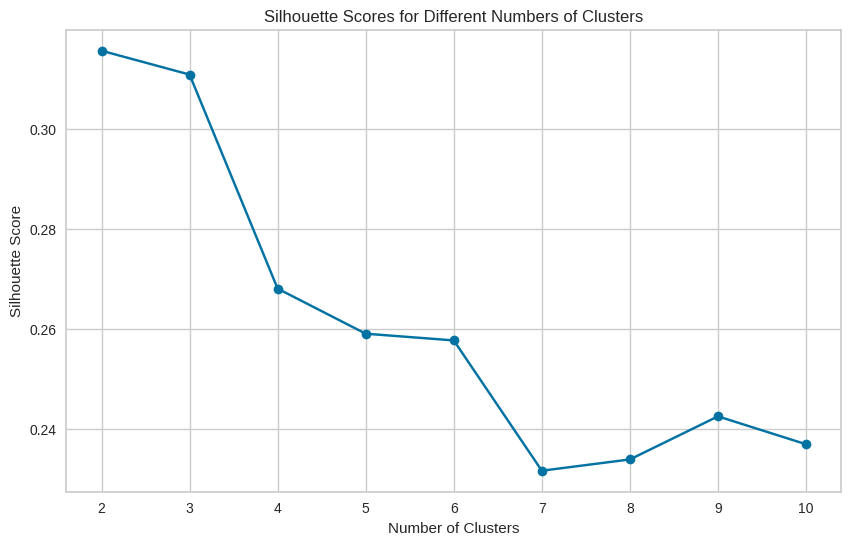

(2, 0.3165957948156324, 0.3131552621286129)

In [27]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

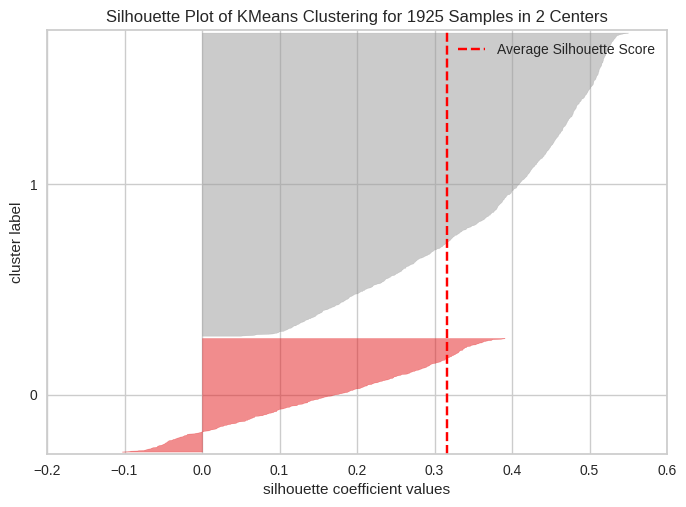

In [28]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

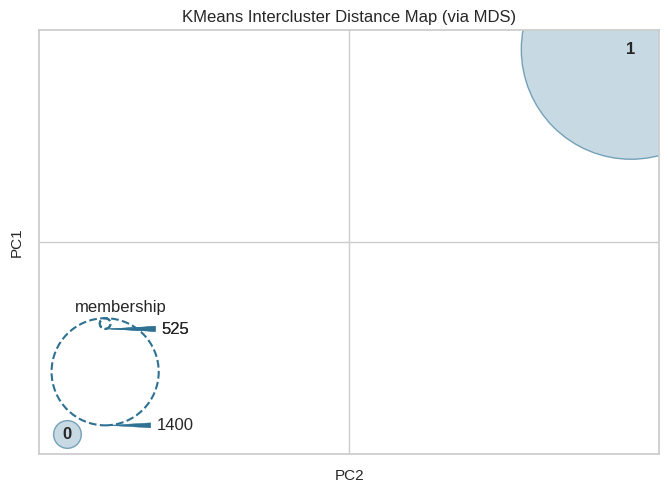

In [29]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

In [49]:
n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.3156622633421653, 0.3110068989948957, 0.268265099605313, 0.25927622510208803, 0.2578261825183163, 0.2313378297619613, 0.23366532680515228, 0.2427148174822771, 0.23446394916582886]


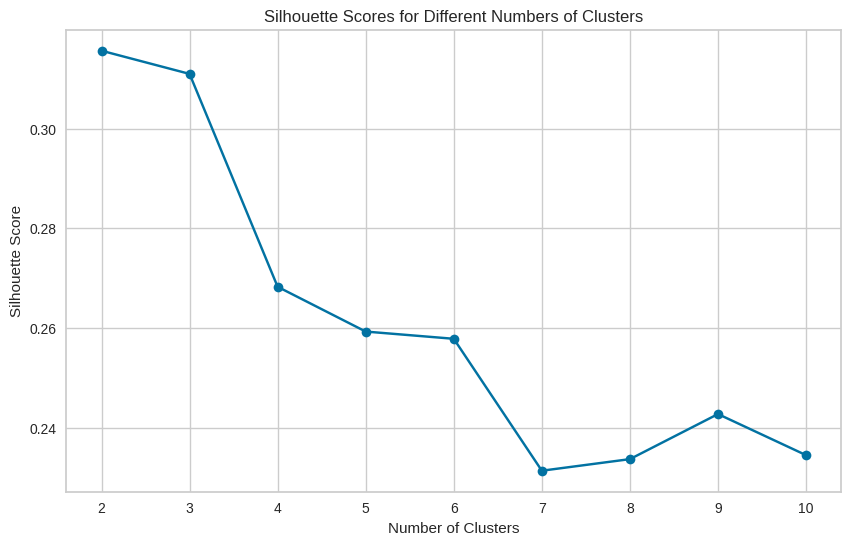

(2, 0.3167332903398681, 0.3133417752977396)

In [50]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

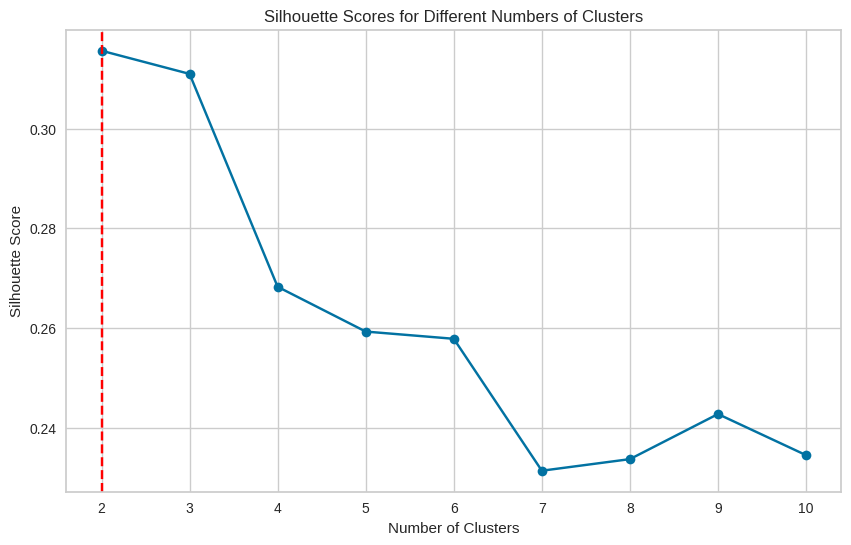

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

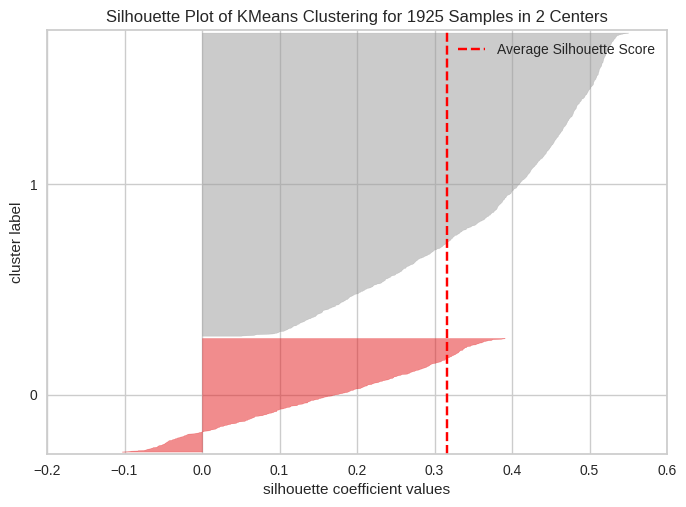

In [52]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

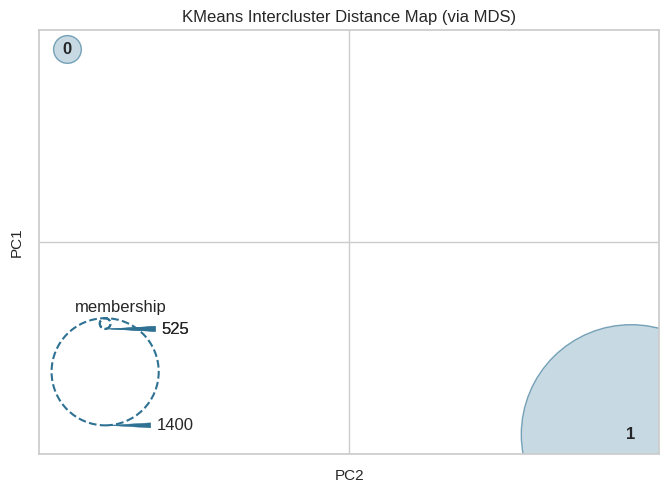

In [53]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()